<a href="https://colab.research.google.com/github/inmas-training/fa21-statistical-methods-workshop/blob/main/02a-data-visualization-with-seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview 

Within this notebook, we go over different ways to graph data with Python. We primarily will focus on using `Seaborn` for visualizations as it has improved graphing features for grouping and handling multivariate data. `Seaborn` is built ontop of `matplotlib`.

If you are working locally, please make sure to install the following packages prior to continuing:

```python  
!pip install -q matplotlib seaborn bokeh plotnine
```

To install, please create a new code cell and run the above command. 

## Diagnostics


In [ ]:
#@title (Hidden) Diagnostic Check
import os
import sys
import pandas as pd
import numpy as np
%tensorflow_version 2.x
import statsmodels 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

print(f"\nPython environment:\n{sys.version}")
print("\nStatistical packages loaded: ")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"statsmodels: {statsmodels.__version__}")
print(f"matplotlib: {matplotlib.__version__}")
print(f"seaborn: {sns.__version__}")

print(f"\nRuntime location:")
try:
  from google.colab import drive
  is_google_colab = True
  print("Notebook is on Google CoLab")
except:
  is_google_colab = False
  print("Notebook is being run locally or through another source.")


# Data


For our exploration, we'll aim to use the [palmer penguins](https://allisonhorst.github.io/palmerpenguins/) data set. 

In [ ]:
import seaborn as sns
penguins = sns.load_dataset("penguins")

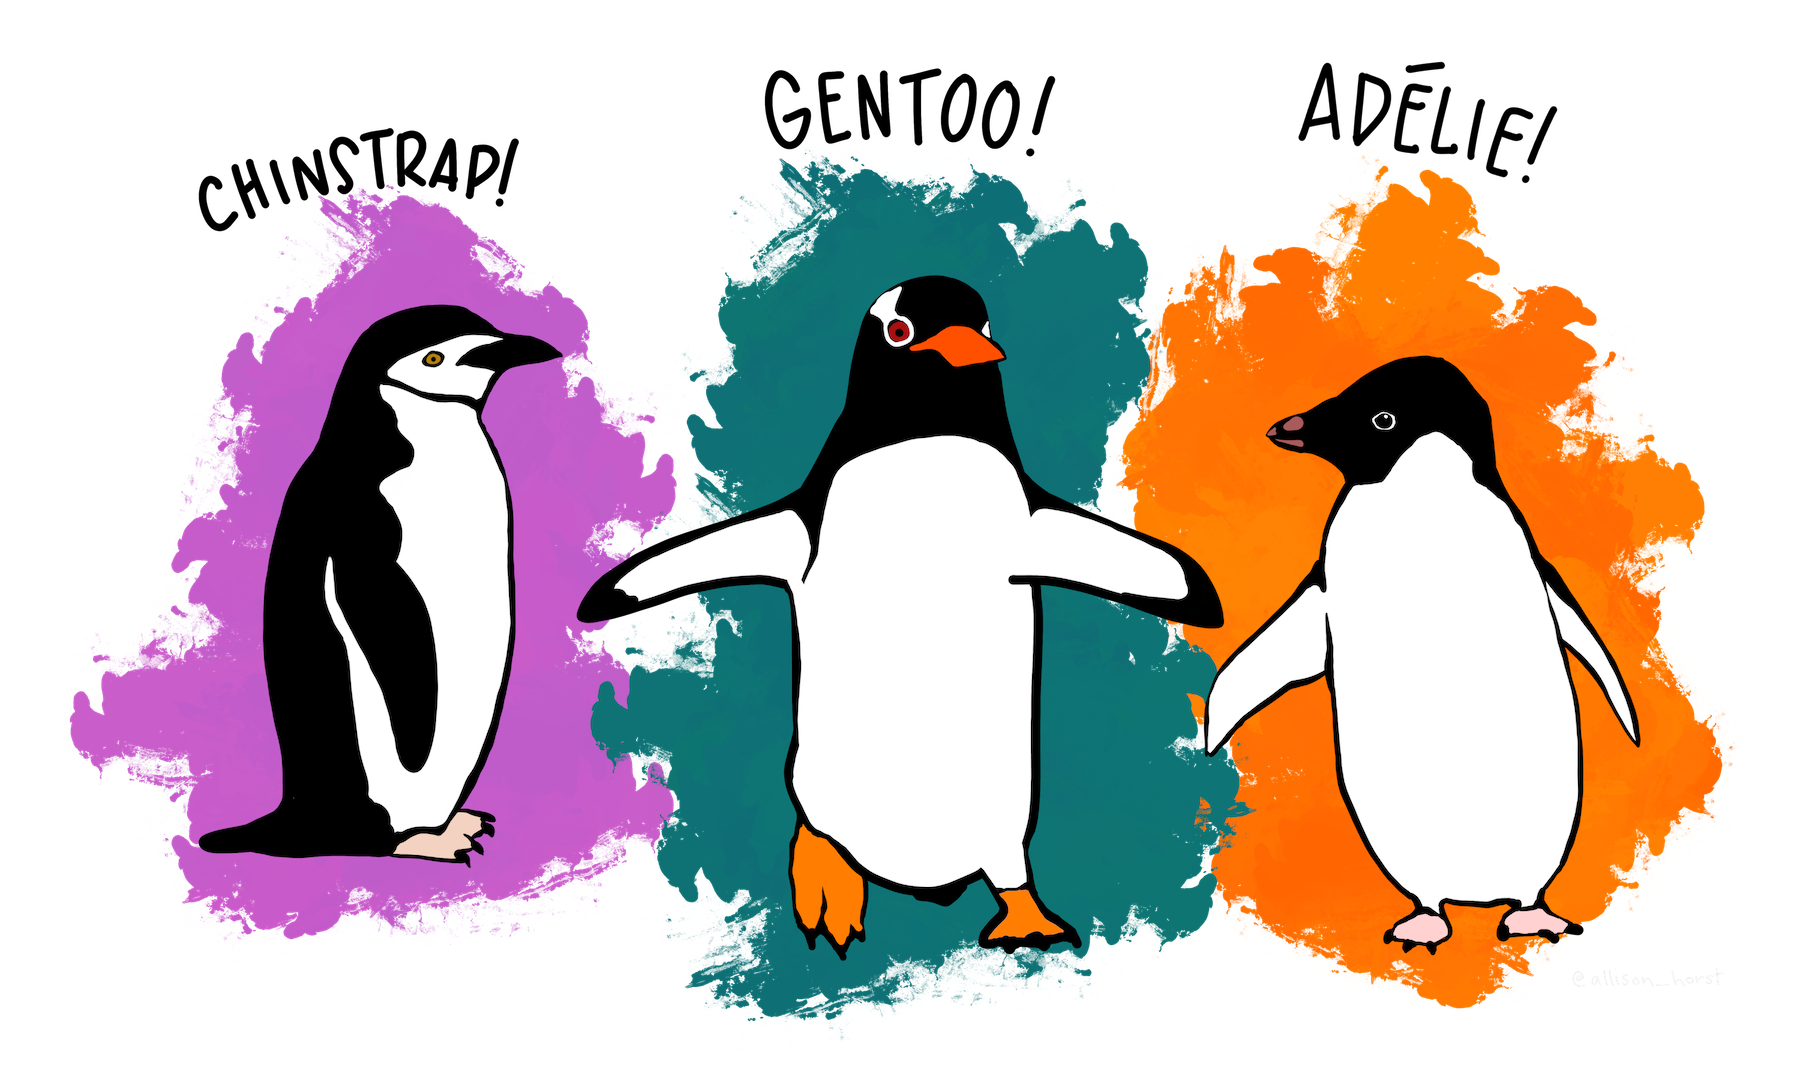

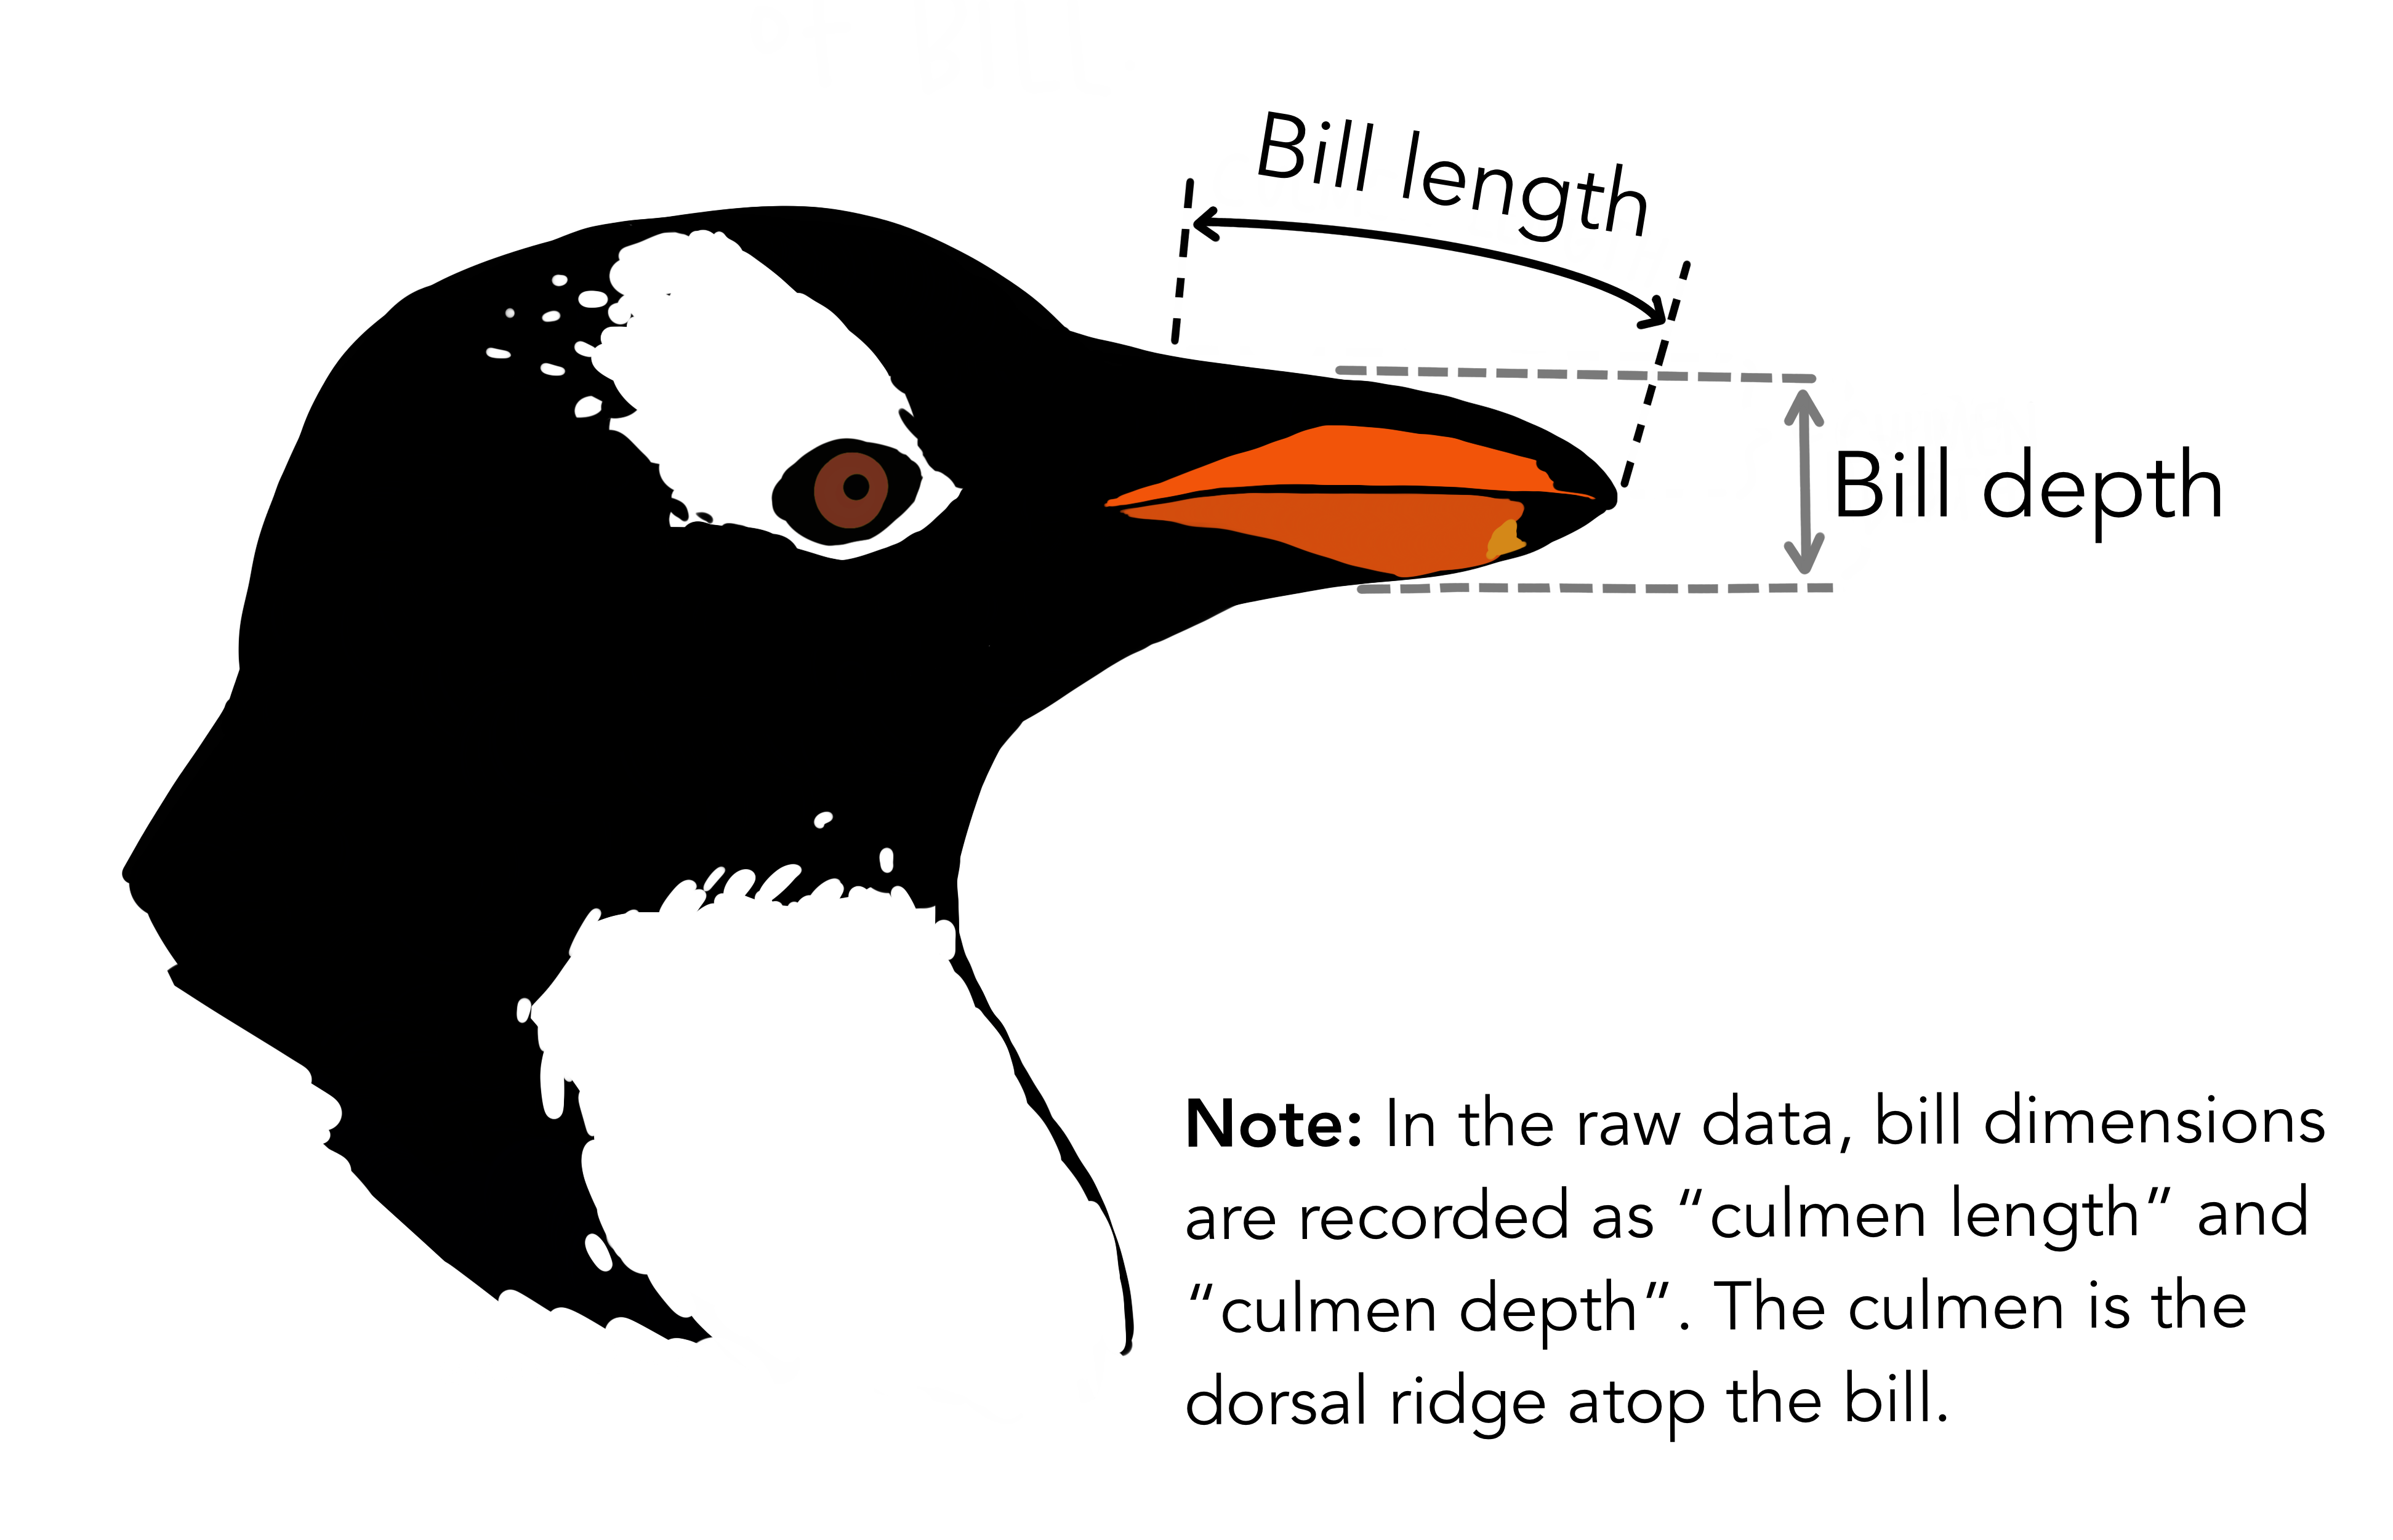

With the data in hand, let's look at a few characteristics of the `pandas` data frame. 

We begin by ensuring the data is imported correctly by looking at the start and end of the data set.

In [ ]:
penguins.head(5)

In [ ]:
penguins.tail(5)

### Your Turn: Interperting Head and Tail 

When looking at the data frame, do we notice any observations that are out of place?

---

 ... answer ... 

---

Determining the data's shape gives us:

In [ ]:
penguins.shape

We con

In [ ]:
penguins.info()

Finally, we seek to obtain a numerical summary of the data using `.describe()`. 

In [ ]:
penguins.describe()

# Libraries



## matplotlib

matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. 


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# Determine a grouping variable for unique species
color_labels = penguins['species'].unique()

# Dynamically select a number of unique species
rgb_values = sns.color_palette("viridis", len(color_labels))

# Automatically map unique values to color values
color_map = dict(zip(color_labels, rgb_values))
# equivalent to:
# color_map = {'Adelie': (0.229739, 0.322361, 0.545706), 
#              'Chinstrap': (0.127568, 0.566949, 0.550556), 
#              'Gentoo': (0.369214, 0.788888, 0.382914)}

fig, ax = plt.subplots()
grouped = penguins.groupby('species')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', 
               x='flipper_length_mm', y='bill_length_mm', 
               label=key, color=color_map[key])


# Set label information
plt.title('Bill Length (mm) vs. Flipper length (mm)')
plt.xlabel('Flipper length (mm)')
plt.ylabel('Bill length (mm)')

# Add legend
plt.legend()

plt.show() # equivalent to ; 

Graph specific terminology is highlighted next as we breakdown the anatomy of a matplotlib figure.

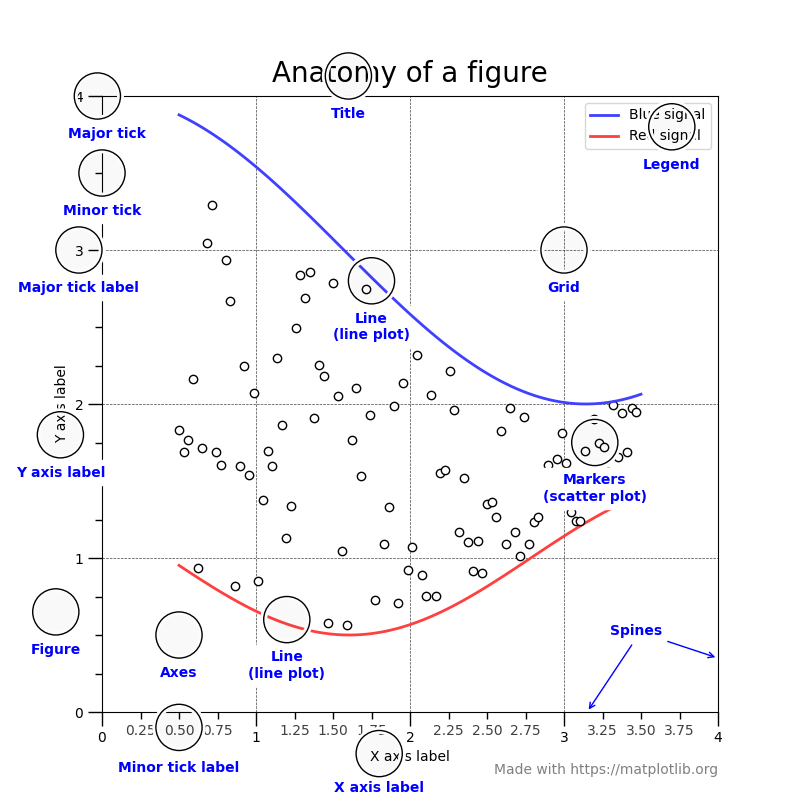


## Seaborn

Seaborn is the most popular data science facing library for Python due to its simplicity in constructing graphics. As we indicated at the start, the library is built ontop of the `matplotlib` library.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Construct scatterplot by groups
sns.scatterplot(data = penguins, 
                x = "flipper_length_mm", y = "bill_length_mm",
                hue = "species")

# Modify seaborn graph by using matplotlib functions
plt.title('Bill Length (mm) vs. Flipper length (mm)')
plt.xlabel('Flipper length (mm)')
plt.ylabel('Bill length (mm)');

## Bokeh

[Bokeh](https://docs.bokeh.org/en/latest/) is a relatively new entry in the Python graphing ecosystem that has earned praise due its interactive-first approach to graphing using JavaScript. By using JavaScript, graphs can be modified on the fly by users whereas the prior approaches discussed will create static graphs that must be manually adjusted to view new data. 

Unfortunately, Google Colab does not include Bokeh in the default environment. Prior to creating the Bokeh graph, please install `bokeh` by running code cell next.


In [ ]:
%%capture 
# Install the bokeh package
!pip install -y bokeh

Once Bokeh is installed, please run the following code to construct an interactive graph. 

In [ ]:
from bokeh.plotting import figure, output_file, show
import bokeh.io
# Ensure visualizations will appear
bokeh.io.output_notebook()

## Color palette setup

# Determine a grouping variable for unique species
color_labels = penguins['species'].unique()

# Dynamically select a number of unique species
rgb_values = ['red', 'green', 'blue']

# Automatically map unique values to color values
color_map = dict(zip(color_labels, rgb_values))

# Map colors to species entries
colors = penguins['species'].map(color_map)

## Create graph under bokeh
p = figure(title = 'Bill Length (mm) vs. Flipper length (mm)')
p.xaxis.axis_label = 'Flipper length (mm)'
p.yaxis.axis_label = 'Bill length (mm)'

p.circle(penguins["flipper_length_mm"], penguins["bill_length_mm"],
         color=colors, fill_alpha=0.2, size=10)

output_file("penguins.html", title="interactive penguins graph")

show(p)

Notice, on the right-hand side of the plot, there is a series of tools that allow the graph to be manipulated without needing to directly specify the output window. The default action is to move around the plot. Selecting the magnifying glass will cause the graph to zoom in on that particular area. 

## plotnine

[plotnine](https://plotnine.readthedocs.io/en/stable/) is an implementation of a grammar of graphics in Python, it is based on _R_'s [`ggplot2`](https://ggplot2.tidyverse.org/) implementation. 

In [ ]:
from plotnine import ggplot, aes, geom_point, labs

(
    ggplot(penguins) 
    + aes(x = "flipper_length_mm", y = "bill_length_mm", color = "species") 
    + geom_point() 
    + labs(
        title = "Bill Length (mm) vs. Flipper length (mm)",
        x = "Flipper Length (mm)",
        y = "Bill length (mm)"
      )  
)


# Graphs

There are five main statistical graphs frequently used:

- scatterplots
- boxplots
- histograms
- barplots
- linegraphs


## Scatterplot

Scatterplots or bivariate plots allow for two numerical variables to be visualized. 

In [ ]:
sns.scatterplot(data=penguins,  x="flipper_length_mm", y="bill_length_mm")

Note, just like before, we aim to suppress the extra message by using a semicolon at the end of the statement.

In [ ]:
sns.scatterplot(data=penguins,  x="flipper_length_mm", y="bill_length_mm");
#                                                 #  Note, the semicolon ^^^

From here, we can highlight specific subgroups by adding a `hue` parameter.

In [ ]:
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species");

We can also add details to each plot by using `matplotlib` like so:

In [ ]:
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")
# Customize with matplotlib
plt.title('Flipper length (mm) vs. Bill Length (mm)')
plt.xlabel('Flipper length (mm)')
plt.ylabel('Bill length (mm)');

### Your Turn: Scatterplot Round 1

Construct a scatterplot comparing `body_mass_g` with `bill_depth_mm`. Color the points by `sex`. 

Add a plot title describing the relationship along with a label for both the $y$ and $x$-axeses. 

## Scatterplot with linear trend line

Alternatively, we can employ an `lmplot` to construct and superimpose on a scatterplot the line of best fit according to linear regression. 


In [ ]:
sns.lmplot(data=penguins, x="flipper_length_mm", y="bill_length_mm");

If we add a grouping variable, like "species", we can see the distinct groups and see a trend line for each group. 

In [ ]:
sns.lmplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species");

### Your Turn: Scatterplot Round 2

Construct a scatterplot with a linear trend line comparing `bill_length_mm` with `depth`. Avoid adding color to the graph.



In [ ]:
# Code here.

What do you notice about the linear trend line in this case?



--- 

... answer here ...

--- 

Next, let's re-create the previous plot, but this time let's add color on the `species` variable. 


In [ ]:
# Code here.

Does the linear trend change? What might this imply about the data? 


--- 

... answer here ...

--- 

## Facet Graphics

Facet are a means to partition the data set by groups into subplots that can be combined together to form a single, larger graph. Facets are useful when there are multiple discrete or categorical variables present. The facet approach is two-fold: 

1. Create a facet grid with the desired row and/or column variables (2 discrete values possible)
2. Map onto the facet grid the desired seaborn graph and variables.


In [ ]:
g = sns.FacetGrid(penguins, col="island")
g.map(sns.scatterplot, "flipper_length_mm", "bill_length_mm");

If we wanted to added color, we would need to use `.map_dataframe()` function to specify `hue`.

In [ ]:
g = sns.FacetGrid(penguins, col="island")
g.map_dataframe(sns.scatterplot, "flipper_length_mm", "bill_length_mm", hue="species");
g.set_axis_labels("Flipper Length (mm)", "Bill Length (mm)")
g.add_legend();

Note, we see that some penguin species are not on the same island. As a result, we're running into duplication in color. 

### Your Turn: Working with Facet Grid

Construct a FacetGrid based on `sex` and `species` for `flipper_length_mm` vs. `bill_length_mm`. Color observations based on `island`. 

In [ ]:
# Code

## Boxplot

A boxplot is a way to showcase relationships with categorical and continuous data. It summarizes information from the 5 number summary: Quantile 25%, Median (50%), Quantile 75%, and outliers.

In [ ]:
# Draw a nested boxplot to show bill length by day and time
sns.boxplot(data = penguins, 
            x="sex",
            y="bill_length_mm", 
            hue="species");

### Your Turn: Viewing Islands

Generate a boxplot that looks at the relationship between `bill_length_mm` and `island`. Color observations based on `sex`.

In [ ]:
## Code Here

Are there any notable patterns with respect to the bill lengths between species? Comment on the state of the whiskers of the Dream island. 

--- 

answer here 

---

## Scatterplots with a Categorical Variable

If we applied a scatterplot when one variable was categorical, the outcome wouldn't look great...

In [ ]:
sns.scatterplot(data = penguins, 
            x="sex",
            y="bill_length_mm", 
            hue="species");

We can address this limitation by using either a `stripplot` or `swarmplot` (also known as a "beeswarm").

In [ ]:
sns.stripplot(data = penguins, 
            x="sex",
            y="bill_length_mm", 
            hue="species", dodge=True);

In [ ]:
sns.swarmplot(data = penguins, 
            x="sex",
            y="bill_length_mm", 
            hue="species", dodge=True);

### Your Turn: Point Arrangement

Viewing the `stripplot` and `swarmplot`, the data is similarly distributed away from being a dense line. 





1. How do the point representation differ overall?


--- 

answer here 

---

2. If we increased the number of observations by a factor of 5, which graph might handle the increase better?


--- 

answer here 

---

## Overlapping plots

Another benefit to seaborn is being able to easily overlap graphs. In fact, we could combine the previously discussed `stripplot` and `boxplot` to observe a clearer picture about the data distribution. 

In [ ]:
ax = sns.boxplot(data = penguins, 
            x="sex",
            y="bill_length_mm", 
            hue="species")
ax = sns.stripplot(data = penguins, 
            x="sex",
            y="bill_length_mm", 
            hue="species", dodge=True);

## Histograms

Histograms specialize in describing how continuous variables are distributed. They're great for identifying the "center" and "spread". However, they can be used to see frequent and infrequent (outlier) values as well. 



In [ ]:
sns.histplot(data=penguins, x="flipper_length_mm");

The shape of a histogram is easily influenced as it requires "bins" to be created algorithmically. 

In [ ]:
sns.histplot(data=penguins, x="flipper_length_mm", bins=30);

In [ ]:
sns.histplot(data=penguins, x="flipper_length_mm", bins=15);

To help see the shape of a distribution, we may wish to apply a kernel smoothing technique. 

In [ ]:
sns.histplot(data=penguins, x="flipper_length_mm", kde=True);

Moreover, we can apply a coloring and layering to see how different distributions "stack".

In [ ]:
sns.histplot(
    penguins, x="flipper_length_mm", hue="species", alpha = 0.5
);

Note, we have two distinct modes between Adelie and Gentoo. The Chinstrap penguins fall inbetween the two distributions. 

Note, we previously focused on looking at a frequency count between bins. We can instead think about viewing a histogram as a density. 

In [ ]:
sns.histplot(
    penguins, x="flipper_length_mm", hue="species", element="step",
    stat="density", common_norm=False, alpha = 0.15
);

### Your Turn: Modifying Bins

Within this exercise, create a histogram that displays the `body_mass_g` separated by `species`. From the base graph, construct three additional histograms with varying `bin` sizes. What happens when the bin size gets large or small? 

In [ ]:
## Code Here

## Barplots

Barplots provide the ability to visualize the discrete distribution of a categorical variable.

In [ ]:
sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    ci="sd", palette="dark", alpha=.6, height=6
);

## Line Graphs


The last type is a line graph. The line graph is best suited for temporal data that goes across time. Unfortunately, palmer's penguins does not include a variable with time dependencies. As a result, let's transistion over to using the `flights` data set.


In [ ]:
flights = sns.load_dataset("flights")
flights.head()

Next, let's subset the data to include only observations from the month of `May` across the years.

In [ ]:
may_flights = flights.query("month == 'May'")
sns.lineplot(data=may_flights, x="year", y="passengers");

## Your Turn: Diamonds are a Data Analyst's Best Friend

Consider the `diamonds` data set available with Seaborn. Note, the data set is a flat-file that uses the `.csv` extension. 

<https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv>

The data set provides an overview of how diamonds are priced. More specifically, each diamond has the following qualities: 

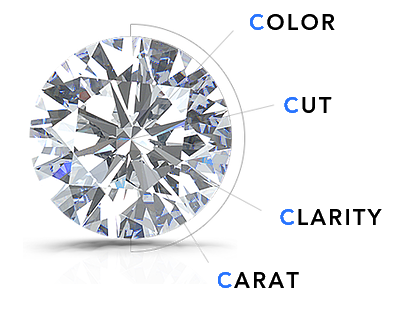

Codebook containing information on variables included:

- `price`: in US dollars: \$326 to \$18,823
- `carat`: weight of the diamond: 0.2 to 5.01
- `cut`: quality of the cut: Fair, Good, Very Good, Premium, Ideal
- `color`: diamond colour: J (worst) to D (best)
- `clarity`: a measurement of how clear the diamond is: I1 (worst), SI2, SI1, VS2, - VS1, VVS2, VVS1, IF (best)
- `depth` - total depth percentage = z / mean(x, y) = 2 * z / (x + y) * table 
- `width` of top of diamond relative to widest point: 43 to 95
- `x`: length in mm: 0 to 10.74
- `y`: width in mm: 0 to 58.9
- `z`: depth in mm:0 to 31.8

### a

Read in the `diamonds` data into _Python_ using Pandas by using the following URL:

<https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv>

_Hints:_ 

- Make sure to import `pandas` before trying to read in data! 
- Verify the separator in the `.csv` file is indeed a comma -- e.g. `,` -- instead of a semicolon -- e.g. `;`. 

In [ ]:
# Code here

### b

Construct a scatterplot that compares the `carat` vs. `price`

In [ ]:
# Code here

Are there any noticable trends in the data? 

### c

Revisiting the `carat` vs. `price` comparison, construct a scatter plot that displays the color and trend line of price by `clarity`.

In [ ]:
# Code Here

With the addition of `clarity`, how does there any noticable trends in the data? 

... answer here ... 

### d

Construct a Facet Grid of scatterplots that graph the relationship of `carat` vs. `price` split by `clarity`. Highlight different groups by applying a hue to `cut`. 


In [ ]:
# Code here

### e 

Instead of partitioning just on `clarity`, revisit the prior facet grid and change the partition to be by the levels of `color` and `clarity`.

In [ ]:
# Code here